#ReAct Agent with Basic ML Algorithms
Made by: Wilfredo Aaron Sosa Ramos

In [ ]:
!pip install -q langchain langchain_google_genai langchain_community langchain_core langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = userdata.get('GOOGLE_API_KEY')

_set_env("GOOGLE_API_KEY")

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp", temperature=0)

In [ ]:
from sklearn.datasets import load_iris, load_diabetes

# Load Iris dataset
iris_data = load_iris(as_frame=True)
print("Iris Dataset Columns:")
print(iris_data.frame.columns)
print(iris_data)

# Load Diabetes dataset (replacement for Boston)
diabetes_data = load_diabetes(as_frame=True)
print("\nDiabetes Dataset Columns:")
print(diabetes_data.frame.columns)
print(diabetes_data)

Iris Dataset Columns:
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4 

In [ ]:
from typing import Literal

from langchain_core.tools import tool

from typing import List, Literal
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error,
    classification_report,
)
import numpy as np

def load_dataset_and_split(name: Literal["iris", "diabetes"]):
    """Load a dataset and split it into features (X) and target (y)."""
    if name == "iris":
        from sklearn.datasets import load_iris
        dataset = load_iris(as_frame=True)
        return dataset.frame.drop(columns=["target"]), dataset.frame["target"]
    elif name == "diabetes":
        from sklearn.datasets import load_diabetes
        dataset = load_diabetes(as_frame=True)
        return dataset.frame.drop(columns=["target"]), dataset.frame["target"]
    else:
        raise ValueError(f"Unknown dataset: {name}")

# Tool 1: Logistic Regression
@tool
def logistic_regression_train(dataset_name: Literal["iris", "diabetes"]):
    """Train a Logistic Regression model."""
    X, y = load_dataset_and_split(dataset_name)
    model = LogisticRegression()
    model.fit(X, y)
    return f"Logistic Regression model trained on {dataset_name} dataset."

# Tool 2: Support Vector Classifier (SVC)
@tool
def support_vector_classifier_train(dataset_name: Literal["iris", "diabetes"], kernel: str = "rbf"):
    """Train a Support Vector Classifier model."""
    X, y = load_dataset_and_split(dataset_name)
    model = SVC(kernel=kernel)
    model.fit(X, y)
    return f"SVC model with kernel='{kernel}' trained on {dataset_name} dataset."

# Tool 3: Gradient Boosting Classifier
@tool
def gradient_boosting_train(dataset_name: Literal["iris", "diabetes"], n_estimators: int = 100):
    """Train a Gradient Boosting Classifier model."""
    X, y = load_dataset_and_split(dataset_name)
    model = GradientBoostingClassifier(n_estimators=n_estimators)
    model.fit(X, y)
    return f"Gradient Boosting model trained on {dataset_name} dataset with {n_estimators} estimators."

# Tool 4: Random Forest Regressor
@tool
def random_forest_regressor_train(dataset_name: Literal["iris", "diabetes"], n_estimators: int = 100):
    """Train a Random Forest Regressor model."""
    X, y = load_dataset_and_split(dataset_name)
    model = RandomForestRegressor(n_estimators=n_estimators)
    model.fit(X, y)
    return f"Random Forest Regressor trained on {dataset_name} dataset with {n_estimators} estimators."

# Tool 5: Decision Tree Classifier
@tool
def decision_tree_classifier_train(dataset_name: Literal["iris", "diabetes"], max_depth: int = None):
    """Train a Decision Tree Classifier model."""
    X, y = load_dataset_and_split(dataset_name)
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X, y)
    return f"Decision Tree Classifier trained on {dataset_name} dataset with max_depth={max_depth}."

# Tool 6: K-Nearest Neighbors (KNN)
@tool
def knn_train(dataset_name: Literal["iris", "diabetes"], n_neighbors: int = 5):
    """Train a K-Nearest Neighbors model."""
    X, y = load_dataset_and_split(dataset_name)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X, y)
    return f"KNN model trained on {dataset_name} dataset with {n_neighbors} neighbors."

# Tool 7: DBSCAN Clustering
@tool
def dbscan_clustering(dataset_name: Literal["iris", "diabetes"], eps: float = 0.5, min_samples: int = 5):
    """Perform DBSCAN Clustering."""
    X, _ = load_dataset_and_split(dataset_name)  # Clustering does not require target (y)
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(X)
    return f"DBSCAN clustering performed on {dataset_name} dataset with eps={eps} and min_samples={min_samples}."

# Tool 8: Agglomerative Clustering
@tool
def agglomerative_clustering(dataset_name: Literal["iris", "diabetes"], n_clusters: int = 3):
    """Perform Agglomerative Clustering."""
    X, _ = load_dataset_and_split(dataset_name)  # Clustering does not require target (y)
    model = AgglomerativeClustering(n_clusters=n_clusters)
    model.fit(X)
    return f"Agglomerative Clustering performed on {dataset_name} dataset with {n_clusters} clusters."

# Tool 9: Principal Component Analysis (PCA)
@tool
def pca_analysis(dataset_name: Literal["iris", "diabetes"], n_components: int = 2):
    """Perform PCA dimensionality reduction."""
    X, _ = load_dataset_and_split(dataset_name)  # PCA does not require target (y)
    model = PCA(n_components=n_components)
    principal_components = model.fit_transform(X)
    return f"PCA performed on {dataset_name} dataset with {n_components} components."

@tool
def evaluate_model(
    model_type: Literal[
        "logistic_regression",
        "svc",
        "gradient_boosting",
        "random_forest",
        "decision_tree",
        "knn"
    ],
    dataset_name: Literal["iris", "diabetes"],
    task: Literal["classification", "regression"],
    export_path: str = "./"
):
    """
    Evaluate a trained model's performance on a specific dataset.

    Parameters:
        model_type: The type of model to evaluate.
        dataset_name: The name of the dataset to use for evaluation.
        task: Specify if the task is classification or regression.
        export_path: Path to export generated plots.

    Returns:
        A dictionary summarizing the model's evaluation results.
    """
    import os
    import time
    import numpy as np
    from sklearn.metrics import (
        accuracy_score,
        precision_score,
        recall_score,
        f1_score,
        roc_auc_score,
        confusion_matrix,
        classification_report,
        mean_squared_error,
        mean_absolute_error,
    )
    import matplotlib.pyplot as plt
    import seaborn as sns

    os.makedirs(export_path, exist_ok=True)

    # Load dataset
    X, y = load_dataset_and_split(dataset_name)

    # Simulate trained models (replace these with actual trained models in production)
    trained_models = {
        "logistic_regression": LogisticRegression().fit(X, y),
        "svc": SVC(probability=True).fit(X, y),
        "gradient_boosting": GradientBoostingClassifier().fit(X, y),
        "random_forest": RandomForestRegressor().fit(X, y),
        "decision_tree": DecisionTreeClassifier().fit(X, y),
        "knn": KNeighborsClassifier().fit(X, y),
    }

    model = trained_models.get(model_type)
    if model is None:
        raise ValueError(f"Unknown model type: {model_type}")

    # Start timer
    start_time = time.time()

    # Predictions
    y_pred = model.predict(X)
    results = {}

    if task == "classification":
        # Classification Metrics
        results["Accuracy"] = accuracy_score(y, y_pred)
        results["Precision"] = precision_score(y, y_pred, average="weighted")
        results["Recall"] = recall_score(y, y_pred, average="weighted")
        results["F1 Score"] = f1_score(y, y_pred, average="weighted")
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X)
            results["ROC AUC"] = roc_auc_score(y, y_proba, multi_class="ovr")

        # Confusion Matrix
        cm = confusion_matrix(y, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.savefig(f"{export_path}/confusion_matrix.png")
        plt.show()

        # Classification Report
        print("Classification Report:")
        print(classification_report(y, y_pred))

    elif task == "regression":
        # Regression Metrics
        results["Mean Squared Error (MSE)"] = mean_squared_error(y, y_pred)
        results["Mean Absolute Error (MAE)"] = mean_absolute_error(y, y_pred)
        results["Root Mean Squared Error (RMSE)"] = np.sqrt(mean_squared_error(y, y_pred))

        # Plot Predictions vs True Values
        plt.figure(figsize=(8, 6))
        plt.scatter(y, y_pred, alpha=0.5)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red")
        plt.title("Predictions vs True Values")
        plt.xlabel("True Values")
        plt.ylabel("Predictions")
        plt.savefig(f"{export_path}/predictions_vs_true.png")
        plt.show()

    else:
        raise ValueError("Task must be 'classification' or 'regression'")

    # End timer
    end_time = time.time()
    elapsed_time = end_time - start_time
    results["Evaluation Time (seconds)"] = elapsed_time
    print(f"Model evaluation completed in {elapsed_time:.2f} seconds.")

    return results

# Aggregate all tools
tools = [
    logistic_regression_train,
    support_vector_classifier_train,
    gradient_boosting_train,
    random_forest_regressor_train,
    decision_tree_classifier_train,
    knn_train,
    dbscan_clustering,
    agglomerative_clustering,
    pca_analysis,
    evaluate_model
]

In [ ]:
from langgraph.prebuilt import create_react_agent

graph = create_react_agent(model, tools=tools)

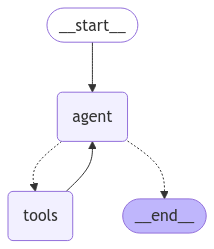

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()


--- Testing models on the iris dataset (classification) ---

Sending request: Can you train the iris dataset using the Logistic Regression? Then evaluate the results.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

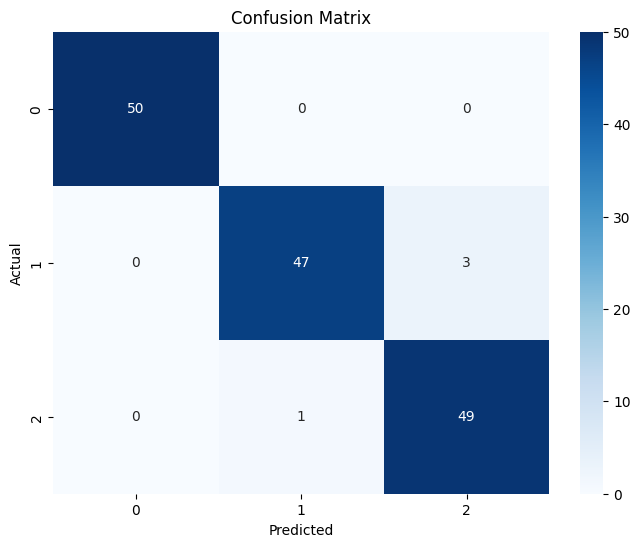

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Model evaluation completed in 0.67 seconds.
Results received for logistic_regression on iris.

Sending request: Can you train the iris dataset using the Svc? Then evaluate the results.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


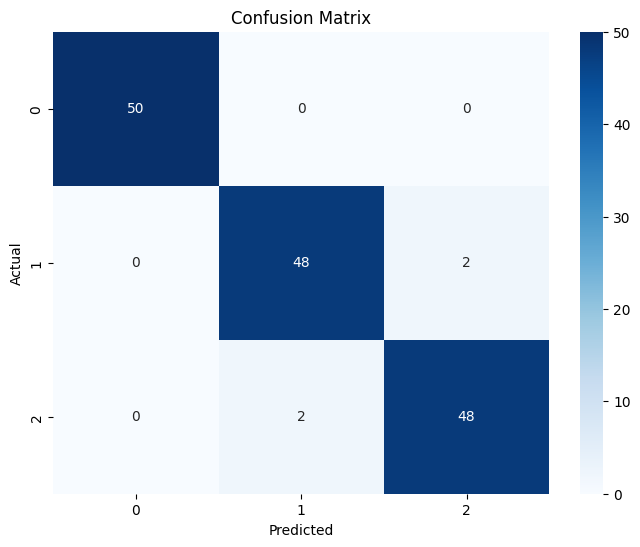

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Model evaluation completed in 0.31 seconds.
Results received for svc on iris.

Sending request: Can you train the iris dataset using the Gradient Boosting? Then evaluate the results.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


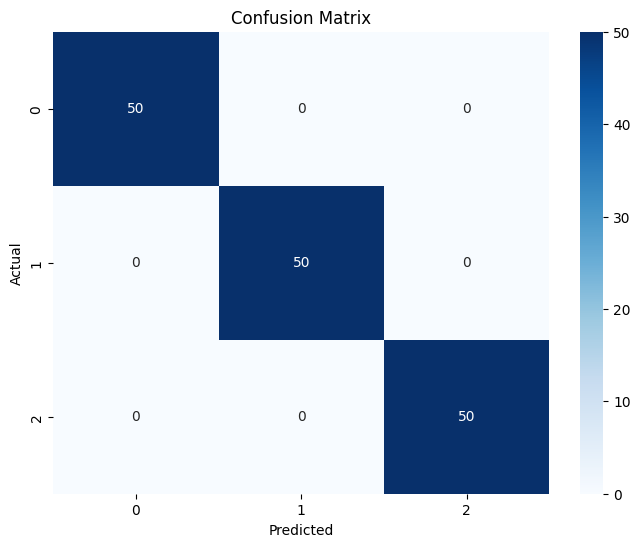

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Model evaluation completed in 0.31 seconds.
Results received for gradient_boosting on iris.

Sending request: Can you train the iris dataset using the Random Forest? Then evaluate the results.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


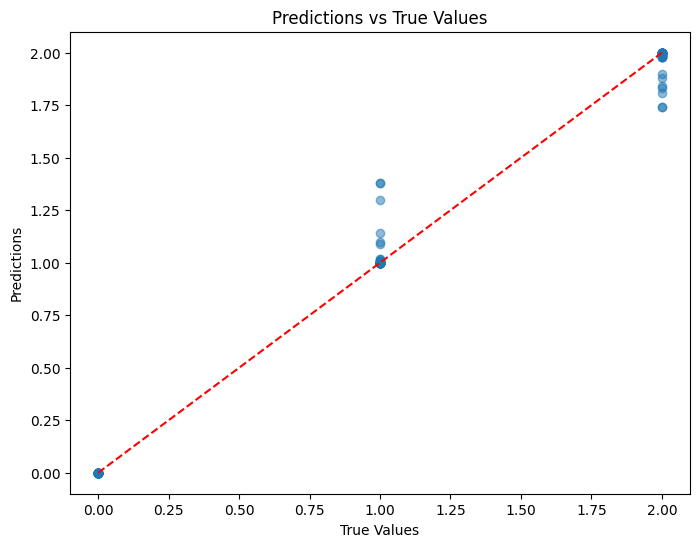

Model evaluation completed in 0.32 seconds.
Results received for random_forest on iris.

Sending request: Can you train the iris dataset using the Decision Tree? Then evaluate the results.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


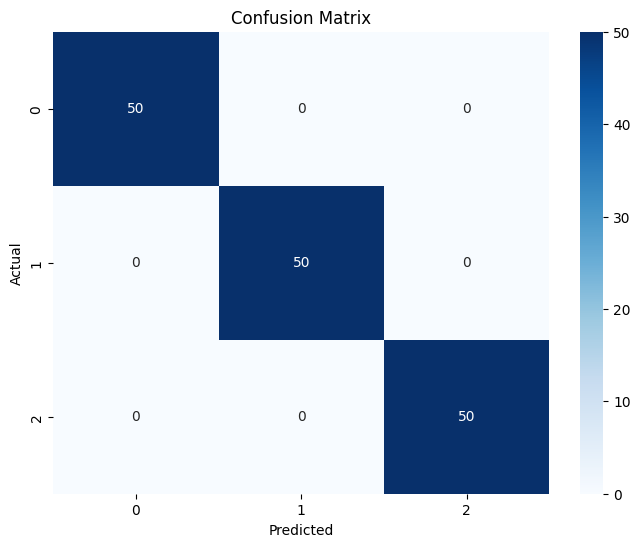

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Model evaluation completed in 0.30 seconds.


Error processing decision_tree on iris: 429 Resource has been exhausted (e.g. check quota).

Sending request: Can you train the iris dataset using the Knn? Then evaluate the results.


Error processing knn on iris: 429 Resource has been exhausted (e.g. check quota).


--- Testing models on the diabetes dataset (regression) ---

Sending request: Can you train the diabetes dataset using the Gradient Boosting? Then evaluate the results.


Error processing gradient_boosting on diabetes: 429 Resource has been exhausted (e.g. check quota).

Sending request: Can you train the diabetes dataset using the Random Forest? Then evaluate the results.
Error processing random_forest on diabetes: 429 Resource has been exhausted (e.g. check quota).


--- All Results ---

{'logistic_regression on iris': [{'messages': [HumanMessage(content='Can you train the iris dataset using the Logistic Regression? Then evaluate the results.', additional_kwargs={}, response_metadata={}, id='4866179d-24e9-482d-b7c1-ce4284387e73')]}, {'messages': [HumanMessage(content='Can you train the iris dataset using the Logistic Regression? Then evaluate the results.', additional_kwargs={}, response_metadata={}, id='4866179d-24e9-482d-b7c1-ce4284387e73'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'evaluate_model', 'arguments': '{"dataset_name": "iris", "model_type": "logistic_regression", "task": "classification"}'}}, response_metadata={'

In [23]:
def test_models_sequentially():
    """
    Test multiple models and datasets sequentially, sending requests to the agent in order.
    Only uses appropriate models for classification and regression tasks.
    """
    datasets = {
        "iris": {
            "task": "classification",
            "models": [
                "logistic_regression",
                "svc",
                "gradient_boosting",
                "random_forest",
                "decision_tree",
                "knn",
            ],
        },
        "diabetes": {
            "task": "regression",
            "models": [
                "gradient_boosting",
                "random_forest",
            ],
        },
    }

    results = []

    for dataset_name, details in datasets.items():
        task = details["task"]
        models = details["models"]

        print(f"\n--- Testing models on the {dataset_name} dataset ({task}) ---\n")
        for model_type in models:
            # Crear el mensaje de entrada para el agente
            inputs = {
                "messages": [
                    (
                        "user",
                        f"Can you train the {dataset_name} dataset using the {model_type.replace('_', ' ').title()}? Then evaluate the results.",
                    )
                ]
            }

            print(f"Sending request: {inputs['messages'][0][1]}")

            # Simulación de envío de solicitudes al agente (modifica según tu implementación real)
            try:
                results_stream = list(graph.stream(inputs, stream_mode="values"))  # Aquí se realiza la llamada al agente
                print(f"Results received for {model_type} on {dataset_name}.\n")
                results.append({f"{model_type} on {dataset_name}": results_stream})
            except Exception as e:
                print(f"Error processing {model_type} on {dataset_name}: {e}\n")

    return results

# Ejemplo de uso
if __name__ == "__main__":
    all_results = test_models_sequentially()

    print("\n--- All Results ---\n")
    for result in all_results:
        print(result)
